In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import argparse
import numpy as np
from keras.models import load_model
import keras
import tqdm

from data import load_from_H5
from viz import plot_predictions, plot_predictions_no_legend
%matplotlib inline

Using TensorFlow backend.


In [2]:

test_hdf5_filepath = 'data/Mauna Loa/test.h5'
train_hdf5_filepath = 'data/Mauna Loa/train.h5'

testset = load_from_H5(test_hdf5_filepath)
trainset = load_from_H5(train_hdf5_filepath)

X_test, y_test = testset
X_train, y_train = trainset

In [3]:
num_hidden_layers = 5
n_hidden = 1024  # num hidden units
epochs = 30
batch_size = 200
epochs_multiplier = 1
tau = 0.1
dropout = 0.1
normalize = False
activation='relu'

In [4]:
net = bnn(
    X_train,
    y_train,
    ([int(n_hidden)] * num_hidden_layers),
    normalize=normalize,
    tau=tau,
    dropout=dropout,
)

NameError: name 'bnn' is not defined

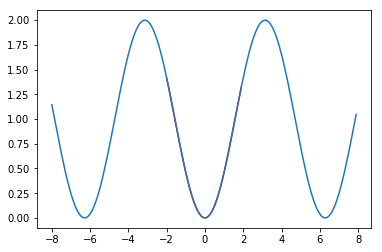

In [79]:
import numpy as np
import matplotlib.pyplot as plt
x2_train = np.arange(-2, 2, 0.1)
x2_test = np.arange(-8, 8, 0.1)
y_train2 = 1-np.cos(x2_train)
x2_train = x2_train[:,np.newaxis]
y_test2 = 1-np.cos(x2_test)
x2_test = x2_test[:,np.newaxis]

plt.plot(x2_train, y_train2, color="r")
plt.plot(x2_test, y_test2)
plt.show()

In [88]:
def plot_predictions_no_legend(net, X_train, y_train, X_test,y_test,
                               iters=200, n_std=4, ax=None,
                               zoomed=False):
    if ax is None:
        plt.close("all")
        plt.clf()
        fig, ax = plt.subplots(1, 1)
        if zoomed:
            plt.axis([-1.75, 3.75, -20, 20])
    y_means, y_stds = net.predict(X_test, T=iters)
    rmse_standard_pred, rmse, test_ll = net.test(X_test, y_test, T=iters)
    ax.plot(X_test, y_means,
            label="test",
            color="b",
            alpha=.8)
    ax.plot(X_test, y_test,
            label="true fn",
            color="g",
            linewidth=1
            )
    ax.axvline(x=-2,   color="gray",
            linestyle=":")
    ax.axvline(x=2,   color="gray",
            linestyle=":")
    for i in range(n_std):
        ax.fill_between(
            X_test.squeeze(),
            (y_means - y_stds * ((i+1)/2)).squeeze(),
            (y_means + y_stds * ((i+1)/2)).squeeze(),
            color="b",
            alpha=0.25**(i+1)
        )
    ax.plot(X_train, y_train, color="r", label="train")

    #plt.text(-1, 1.5, r'rms:' + str(rmse), {'color': 'r', 'fontsize': 12})
    ax.legend()
    return ax

In [6]:
from bnn import bnn


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [80]:
net = bnn(x2_train, y_train2, n_hidden=([int(1024)] * 4))
net.train(x2_train, y_train2, batch_size=128)



  0%|          | 0/200 [00:00<?, ?it/s]

  6%|▋         | 13/200 [00:00<00:01, 116.67it/s]

 12%|█▎        | 25/200 [00:00<00:01, 115.91it/s]

 18%|█▊        | 37/200 [00:00<00:01, 116.49it/s]

 24%|██▍       | 49/200 [00:00<00:01, 116.48it/s]

 30%|███       | 60/200 [00:00<00:01, 114.29it/s]

 36%|███▌      | 71/200 [00:00<00:01, 112.81it/s]

 42%|████▏     | 83/200 [00:00<00:01, 113.43it/s]

 48%|████▊     | 95/200 [00:00<00:00, 114.49it/s]

 54%|█████▎    | 107/200 [00:00<00:00, 115.71it/s]

 60%|█████▉    | 119/200 [00:01<00:00, 114.95it/s]

 66%|██████▌   | 131/200 [00:01<00:00, 115.62it/s]

 72%|███████▏  | 143/200 [00:01<00:00, 114.35it/s]

 78%|███████▊  | 155/200 [00:01<00:00, 114.25it/s]

 84%|████████▎ | 167/200 [00:01<00:00, 97.40it/s] 

 89%|████████▉ | 178/200 [00:01<00:00, 97.98it/s]

 94%|█████████▍| 189/200 [00:01<00:00, 98.56it/s]

100%|██████████| 200/200 [00:01<00:00, 101.56it/s]

160/160 [==============================] - 0s 36us/step


<Figure size 432x288 with 0 Axes>

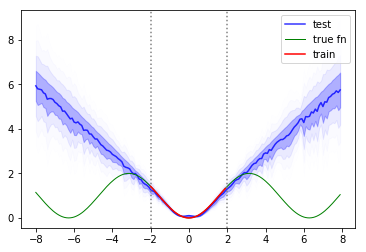

In [89]:
net.tau = 10
plot_predictions_no_legend(net,x2_train, y_train2, x2_test, y_test2)